In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
from matplotlib import cm
from tqdm import tqdm
import math
import numpy as np
import cmasher

import SCA
from SCA import Space_colonization
from point_cloud import PointCloud

import sys
sys.path.insert(1, '/Users/anyak/Documents/Lab/SWC/astroTanya')
sys.path.insert(1, '/Users/anyak/Documents/Lab/neuro.im-proc')
import astrobject
from astrobject import ascii, Table

In [25]:
verbose = False 

In [10]:
def combine_hex_values(d):
  d_items = sorted(d.items())
  tot_weight = sum(d.values())
  red = int(sum([int(k[1:3], 16)*v for k, v in d_items])/tot_weight)
  green = int(sum([int(k[3:5], 16)*v for k, v in d_items])/tot_weight)
  blue = int(sum([int(k[5:7], 16)*v for k, v in d_items])/tot_weight)
  zpad = lambda x: x if len(x)==2 else '0' + x
  name = zpad(hex(red)[2:]) + zpad(hex(green)[2:]) + zpad(hex(blue)[2:])
  return '#' + name

def plot_colortable(colors, *, ncols=4, dpi=150):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=8,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=name, edgecolor='0.7')
        )
def Fade(c1, c2, mix=0):
    c1=np.array(mcolors.to_rgb(c1))
    c2=np.array(mcolors.to_rgb(c2))
    return mcolors.to_hex((1-mix)*c1 + mix*c2)     

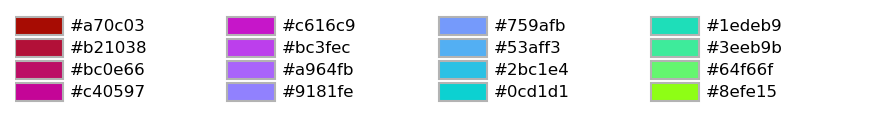

In [11]:
neons = cm.get_cmap('cmr.neon', 16).colors
neons = [mcolors.to_hex(i) for i in neons]
plot_colortable(neons)

In [ ]:
Cloud = PointCloud(R=2, Npoints=500)
sources = Cloud.Sphere()
space = Space_colonization(root=[-0,-0.2, 0.1], sources=sources)

In [18]:
root = [-0,-0.2, 0.1]
Dg = 0.01
Dk = np.sort([0.02, 0.05, 0.1, 0.15])
Di = np.sort([2, 1, 0.5, 0.2])
save_path = '/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/attach/Compare iters unlimited'


# Dk_colors = ['#FFFFFF', '#B6B6B6', '#848484', '#6E6E6E', '#545454', '#404040']
# Di_colors = ['#0077FF', '#736CA0', '#995B80', '#AD5370', '#B33849', '#E11631']

Dk_map = [str(i) for i in np.linspace(0, 1, len(Dk))]
Di_map = cmasher.get_sub_cmap('cmr.neon', 0.0, 0.6, N=len(Di)).colors
# Di_map = cm.get_cmap(neon_part).colors

Dk_colors = [mcolors.to_hex(i) for i in Dk_map]
Di_colors = [mcolors.to_hex(i) for i in Di_map]

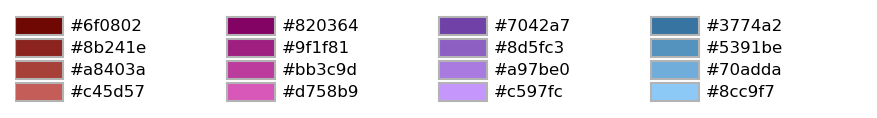

In [19]:
my_mixed_colors = []
for n,i in enumerate(Di):
    for m,k in enumerate(Dk):
        c = combine_hex_values({Dk_colors[m]: 0.5, Di_colors[n]: 1.0})
        my_mixed_colors.append(c)
plot_colortable(my_mixed_colors)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [03:50<11:30, 230.26s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 50%|█████     | 2/4 [07:50<07:52, 236.18s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 75%|███████▌  | 3/4 [11:41<03:53, 233.86s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [1:34:26<4:43:18, 5666.19s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 50%|█████     | 2/4 [1:42:44<1:27:32, 2626.45s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 75%|███████▌  | 3/4 [1:44:29<24:35, 1475.13s/it]  

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [53:18<2:39:56, 3198.69s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 50%|█████     | 2/4 [58:04<49:29, 1484.95s/it]  

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 75%|███████▌  | 3/4 [59:55<14:17, 857.84s/it] 

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [11:13<33:41, 673.96s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 50%|█████     | 2/4 [18:06<17:20, 520.46s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

 75%|███████▌  | 3/4 [20:04<05:36, 336.68s/it]

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 4/4 [21:32<00:00, 323.15s/it]


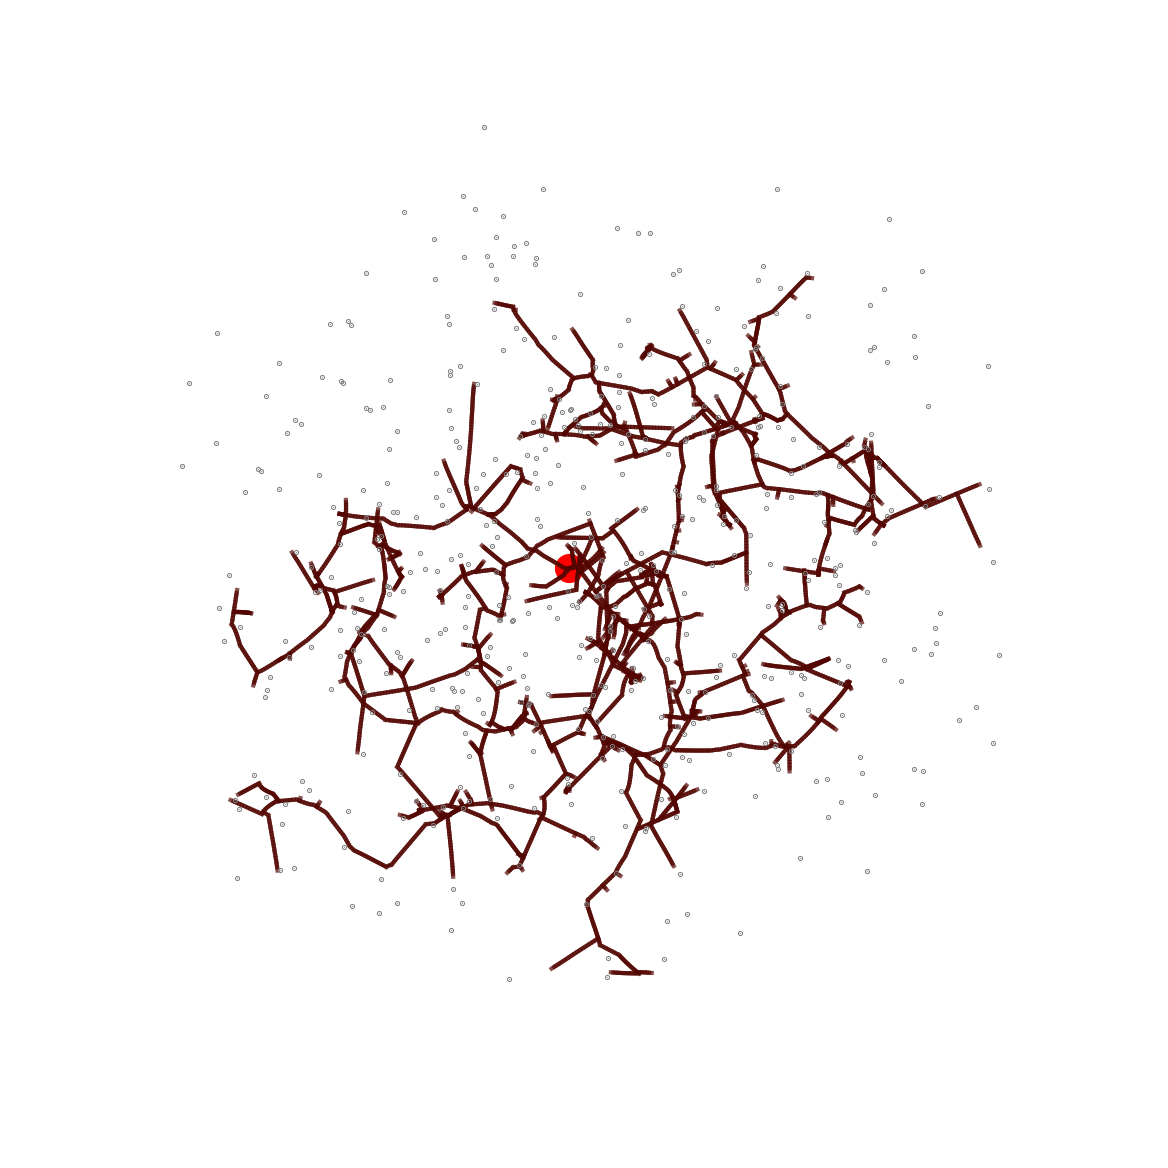

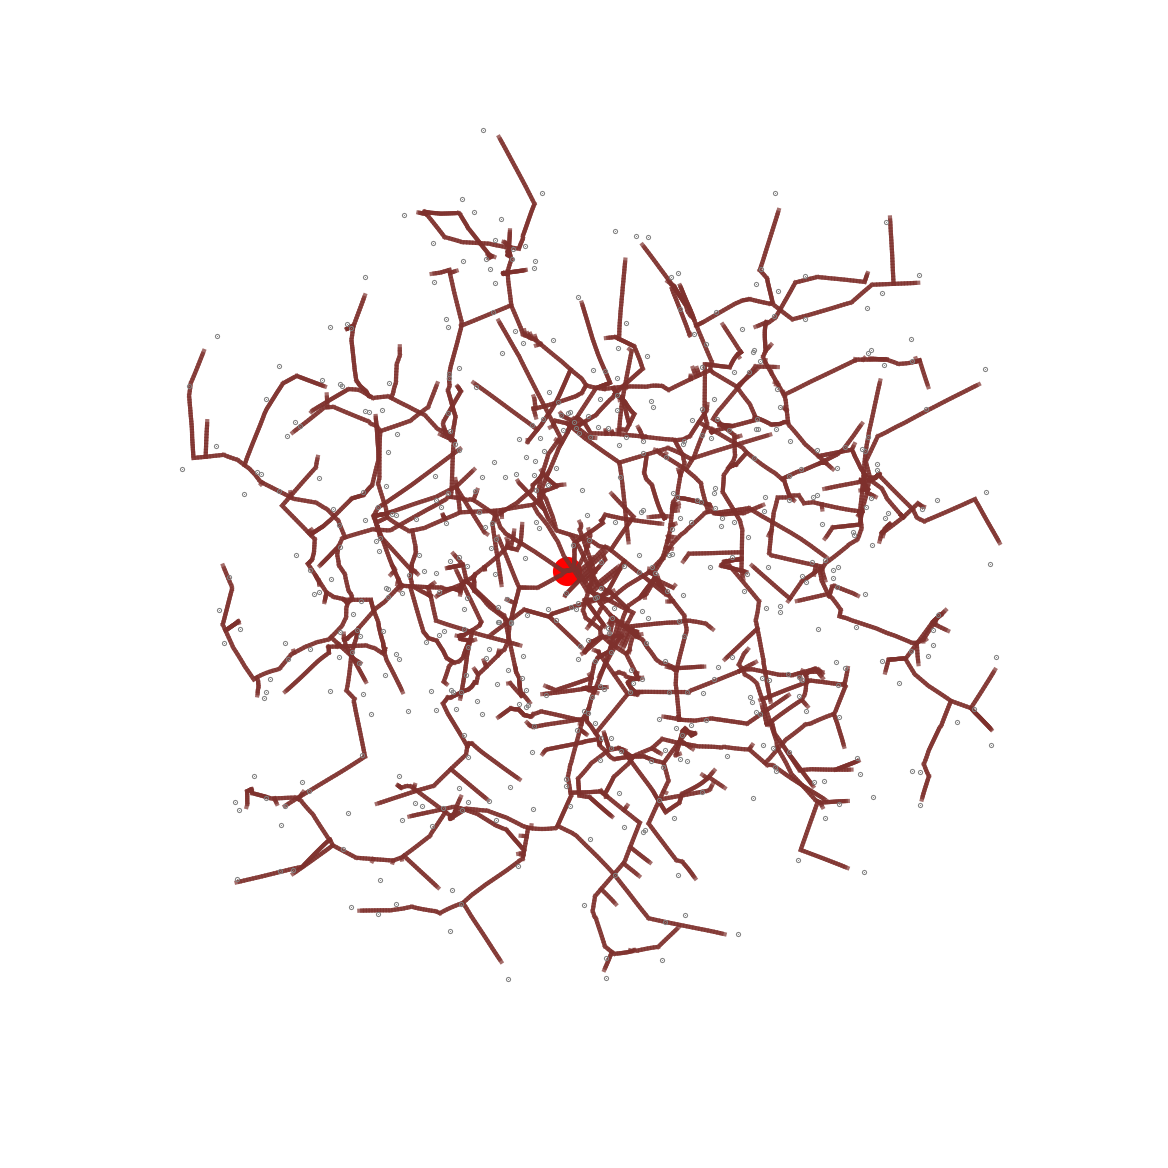

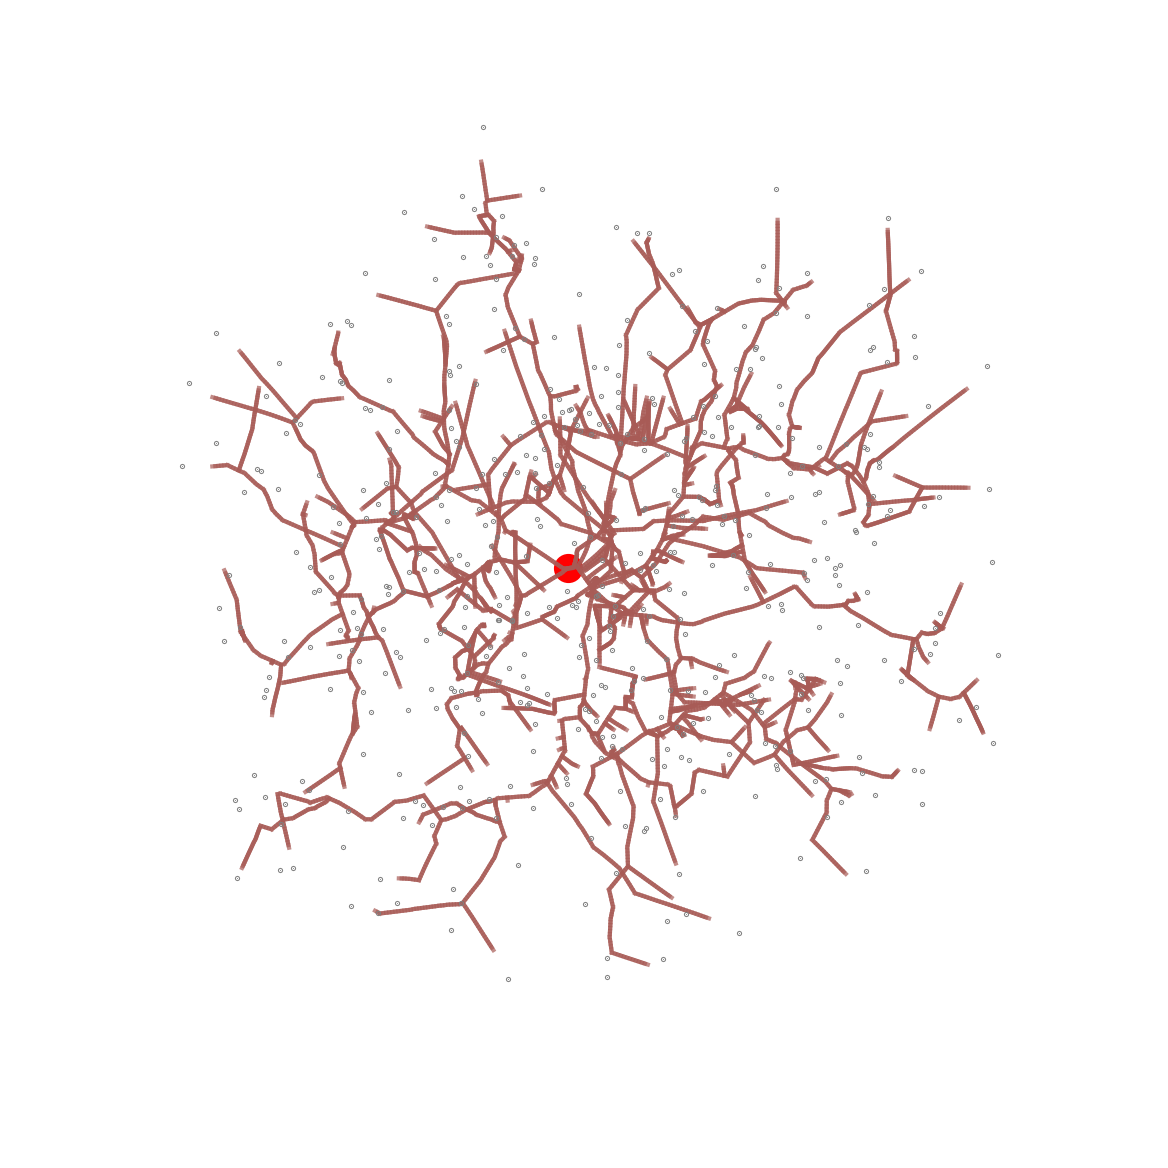

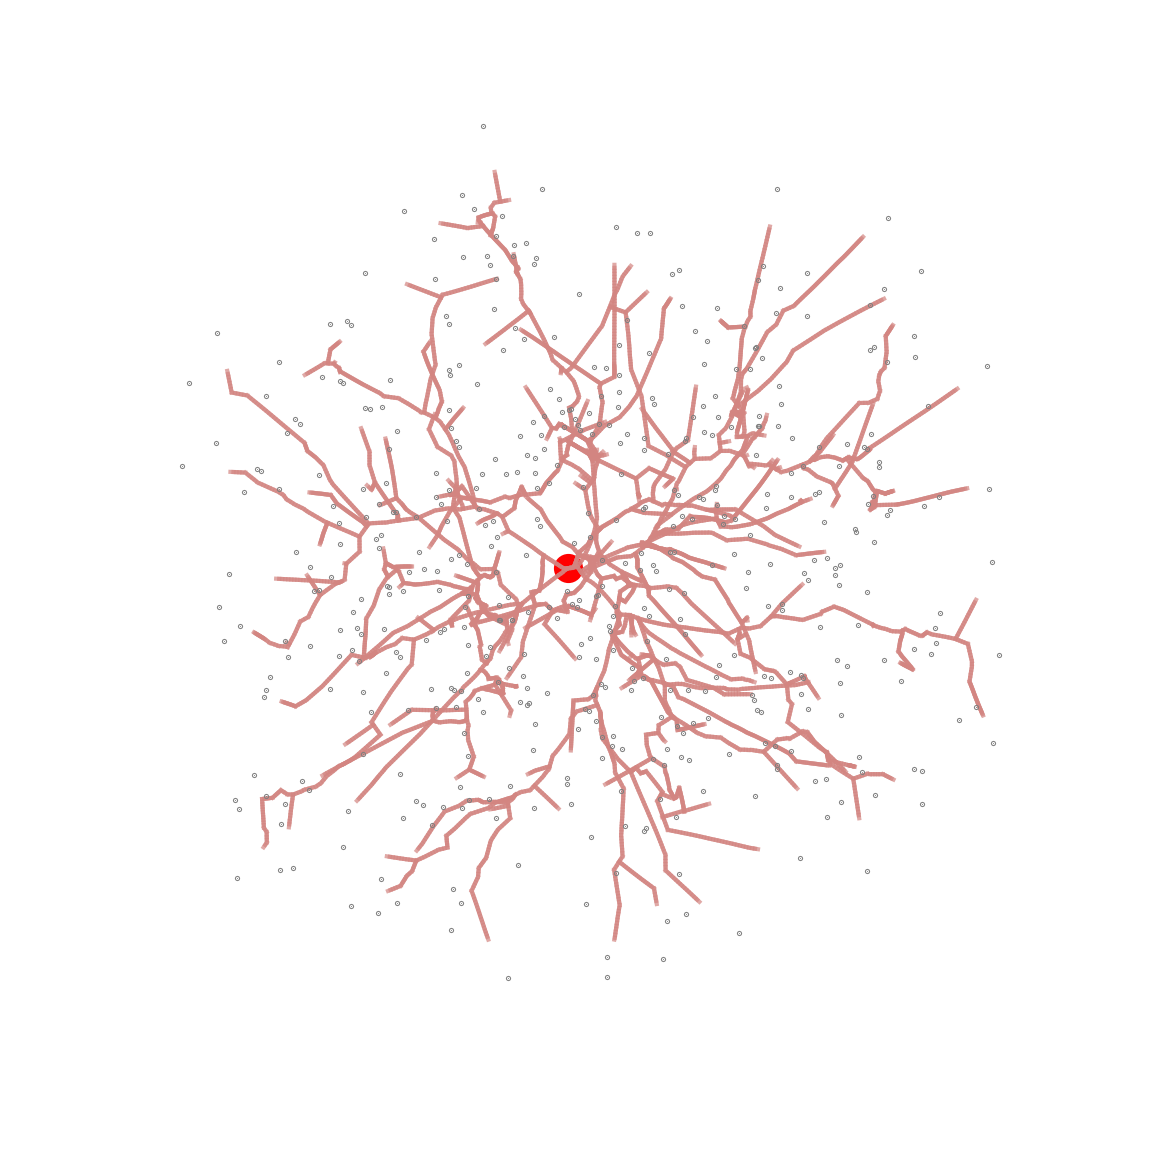

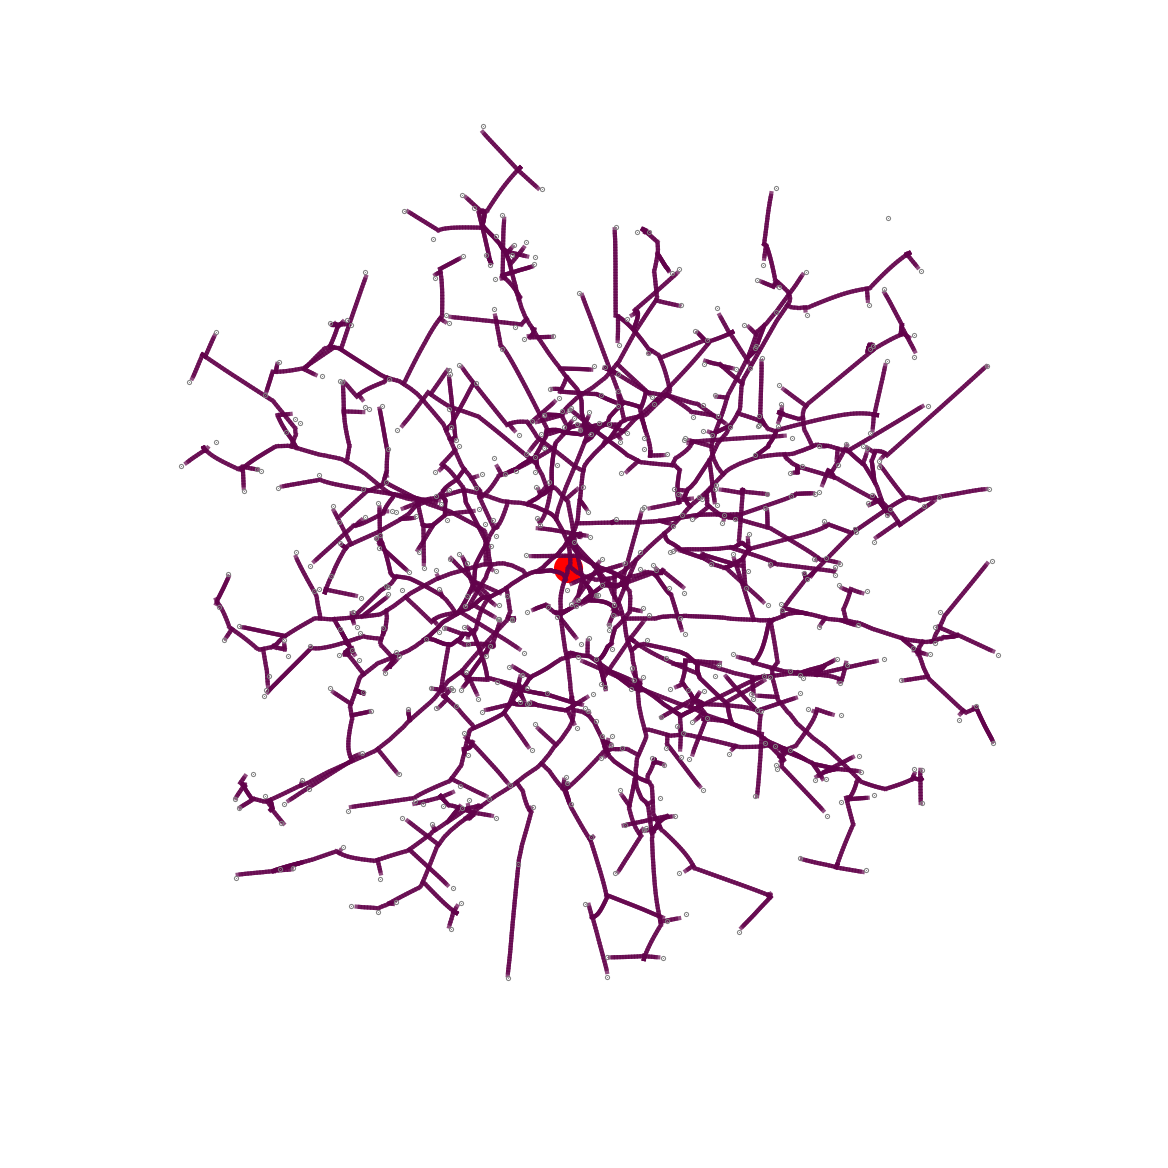

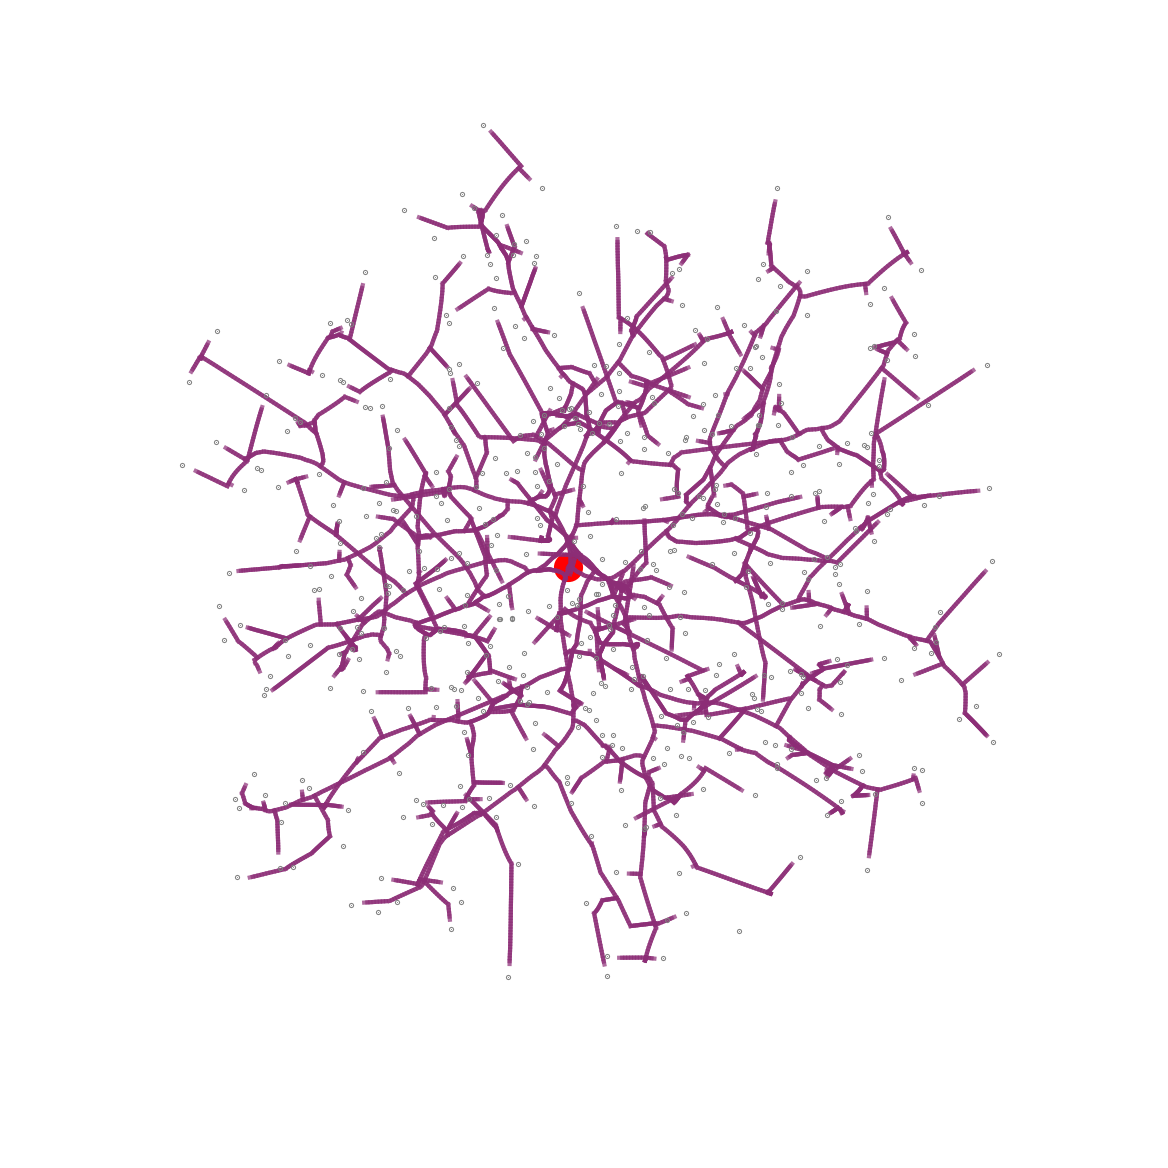

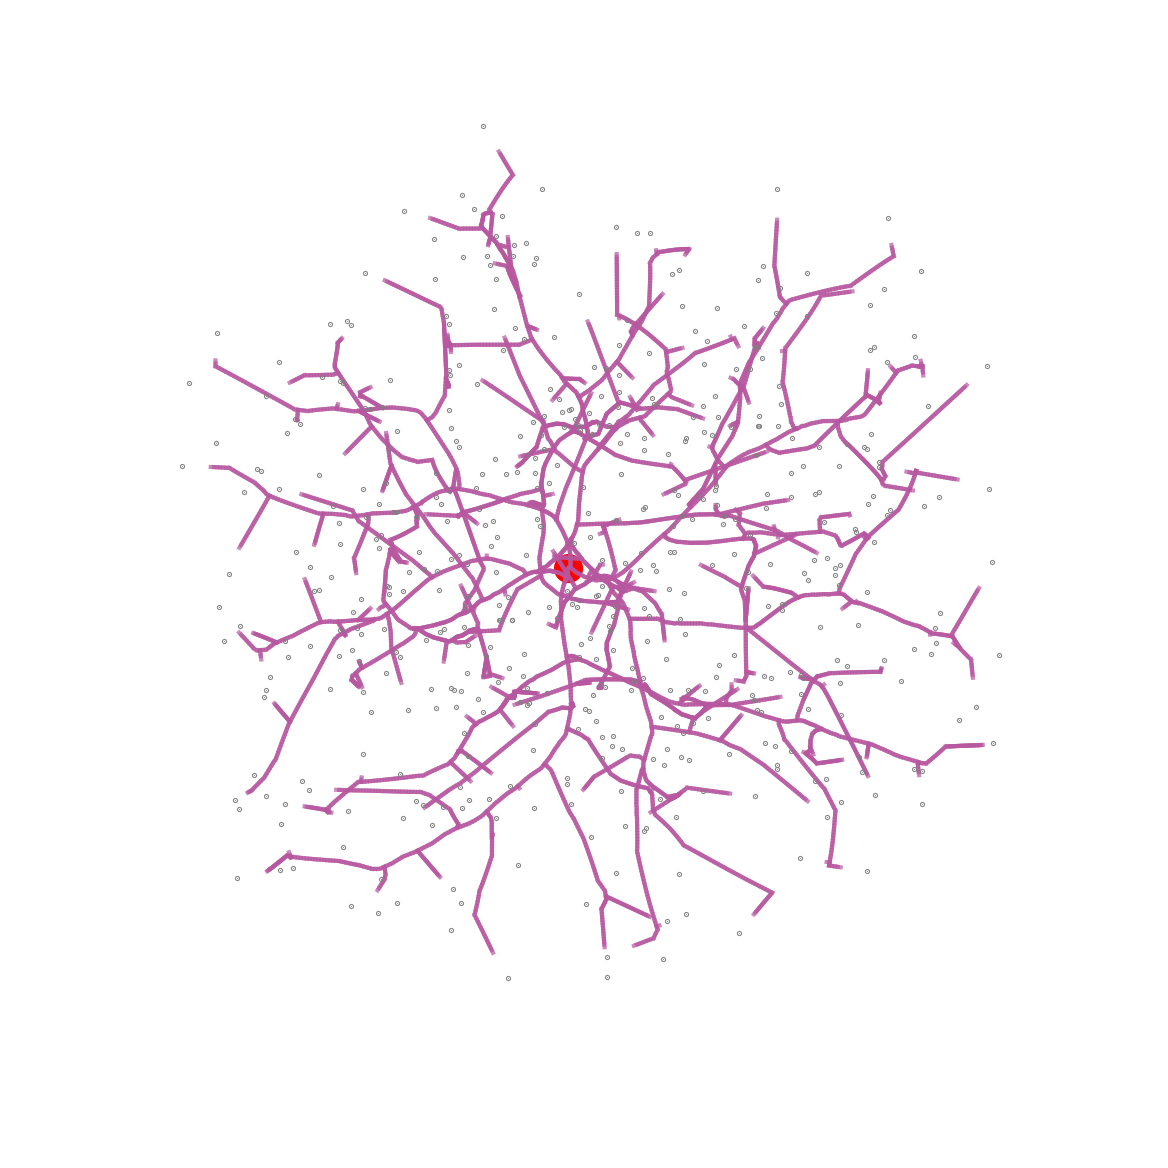

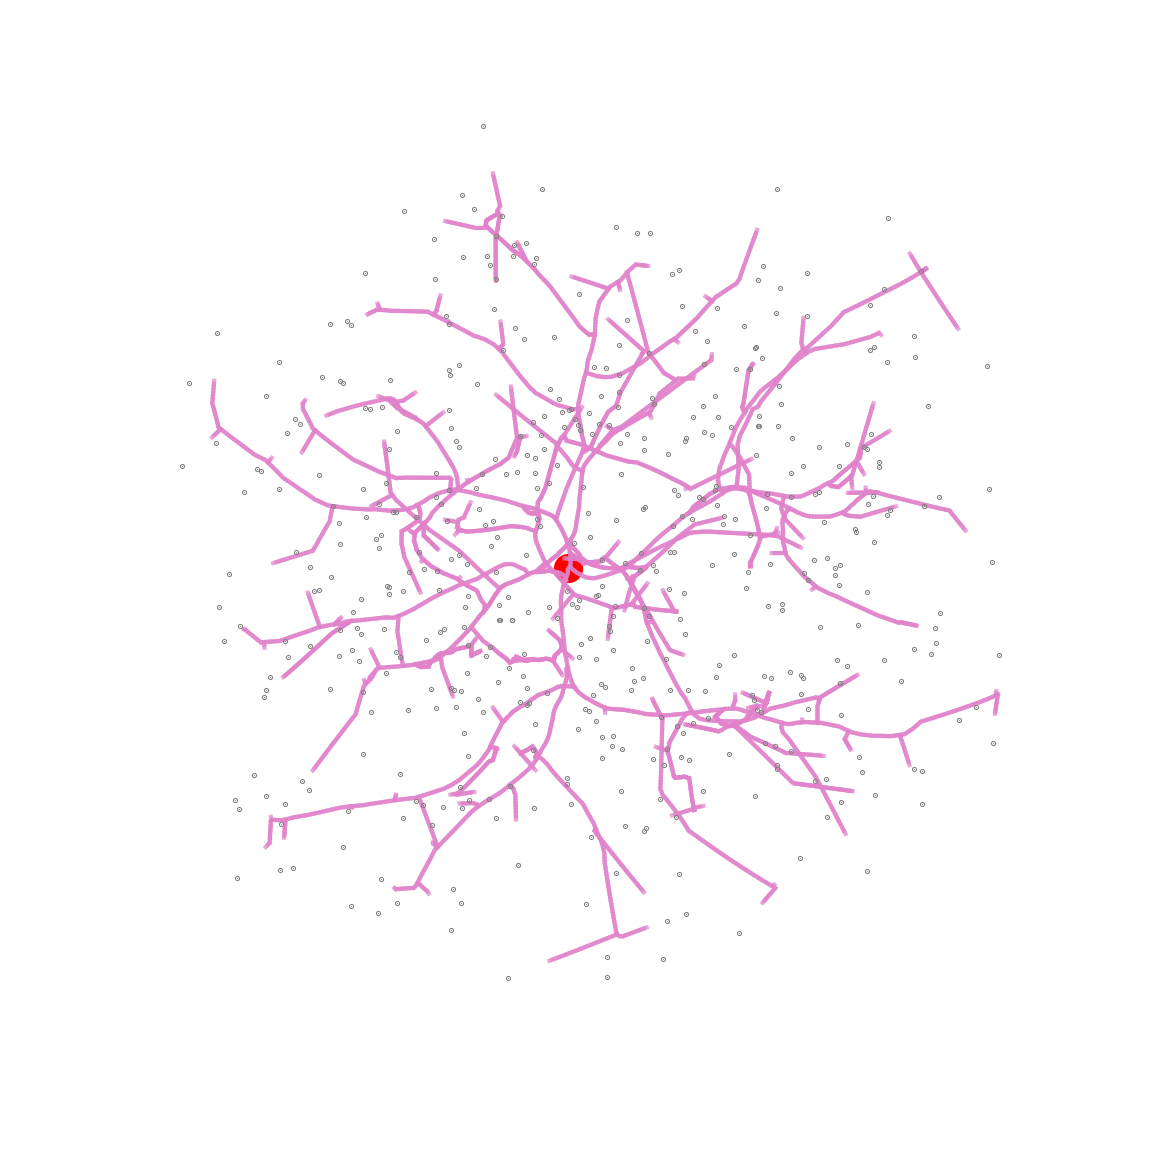

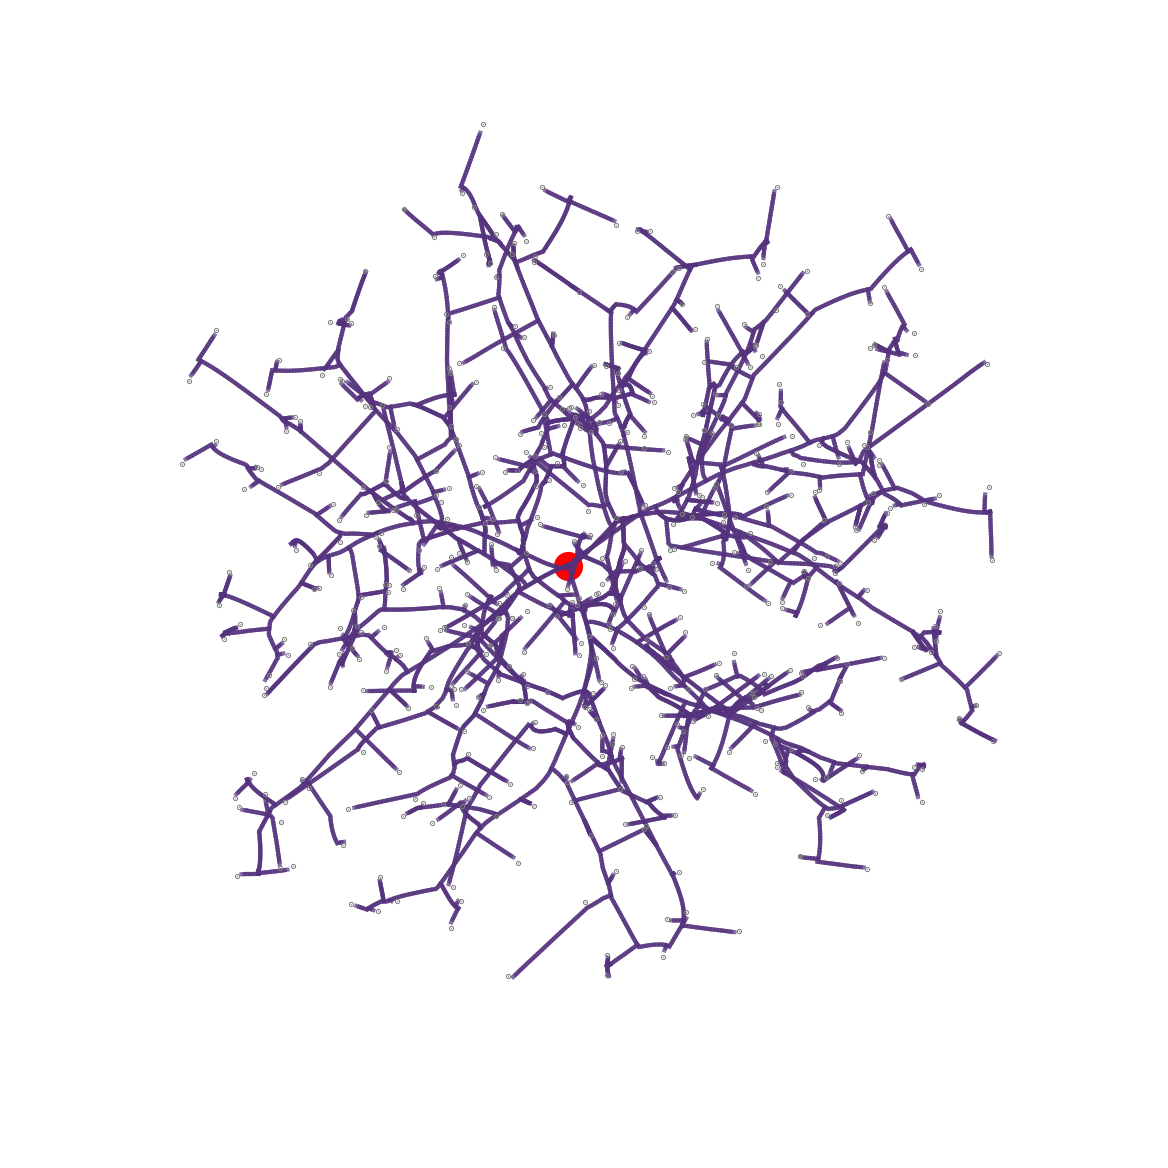

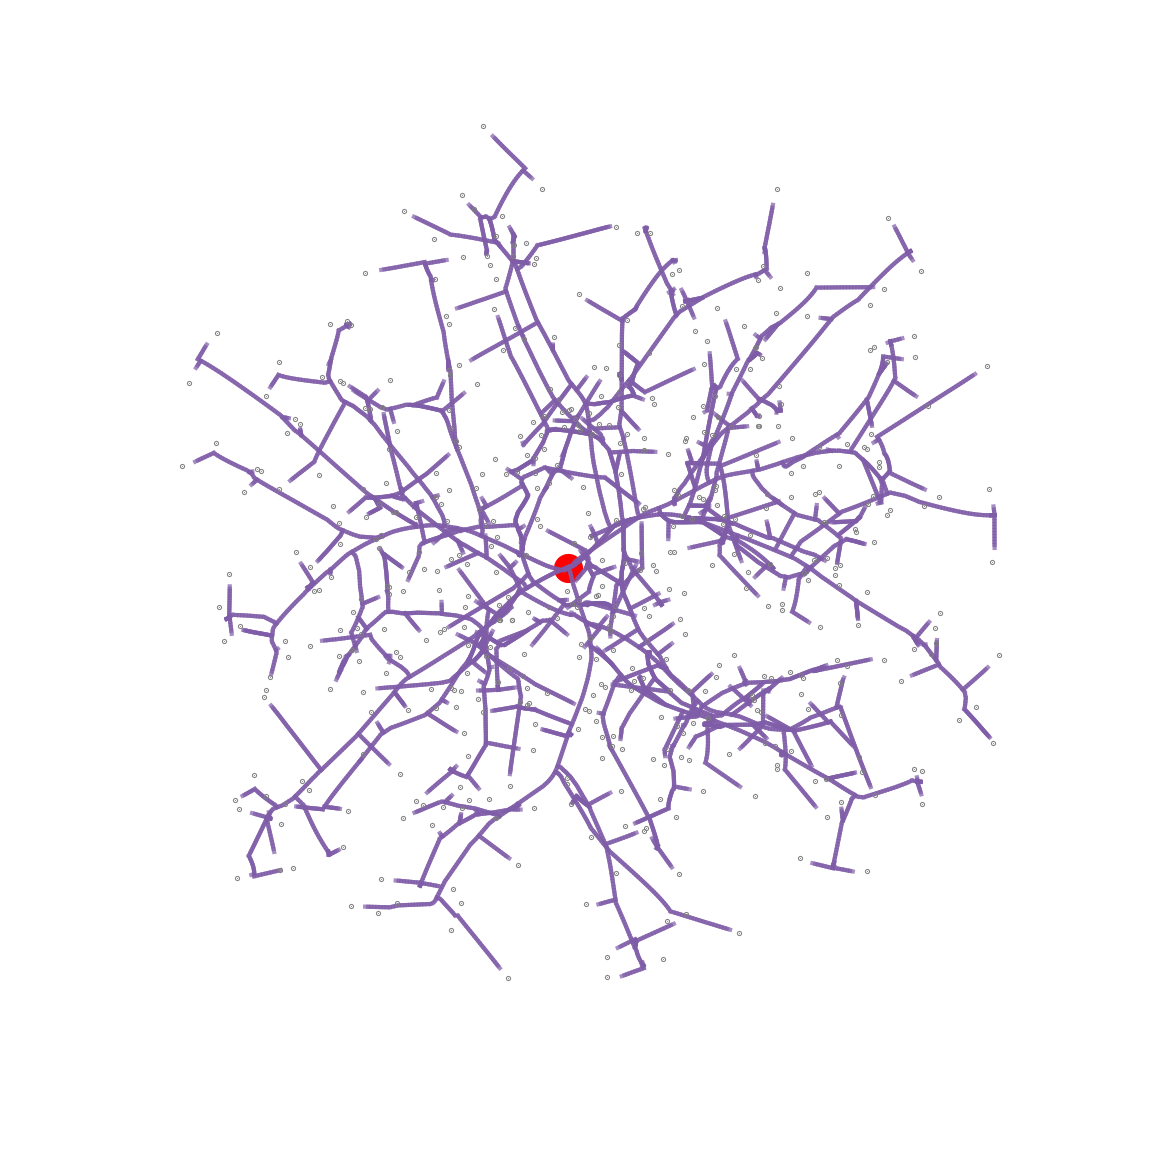

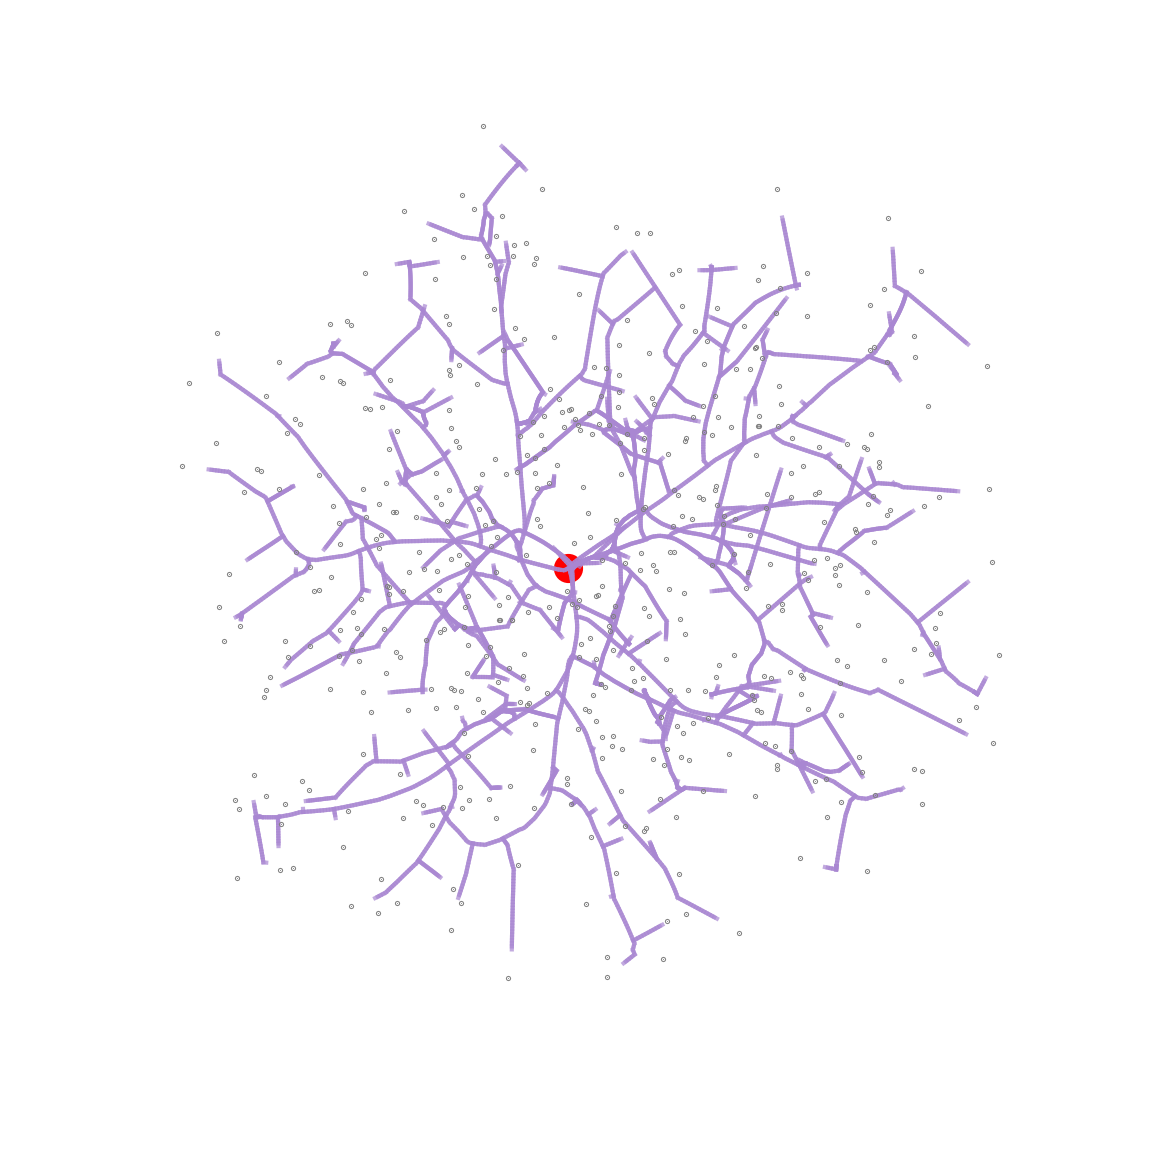

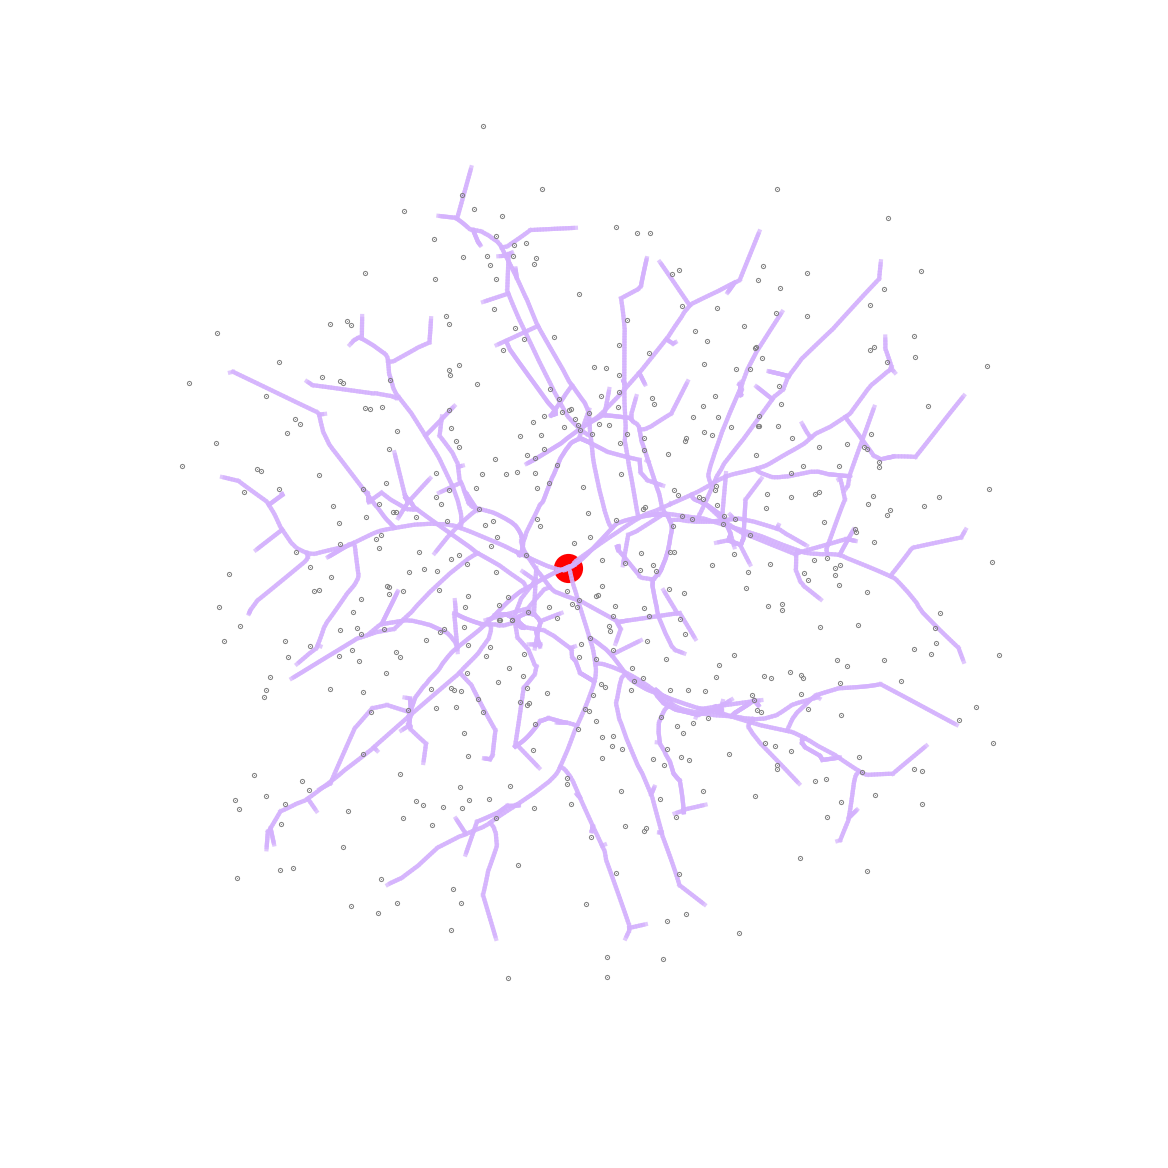

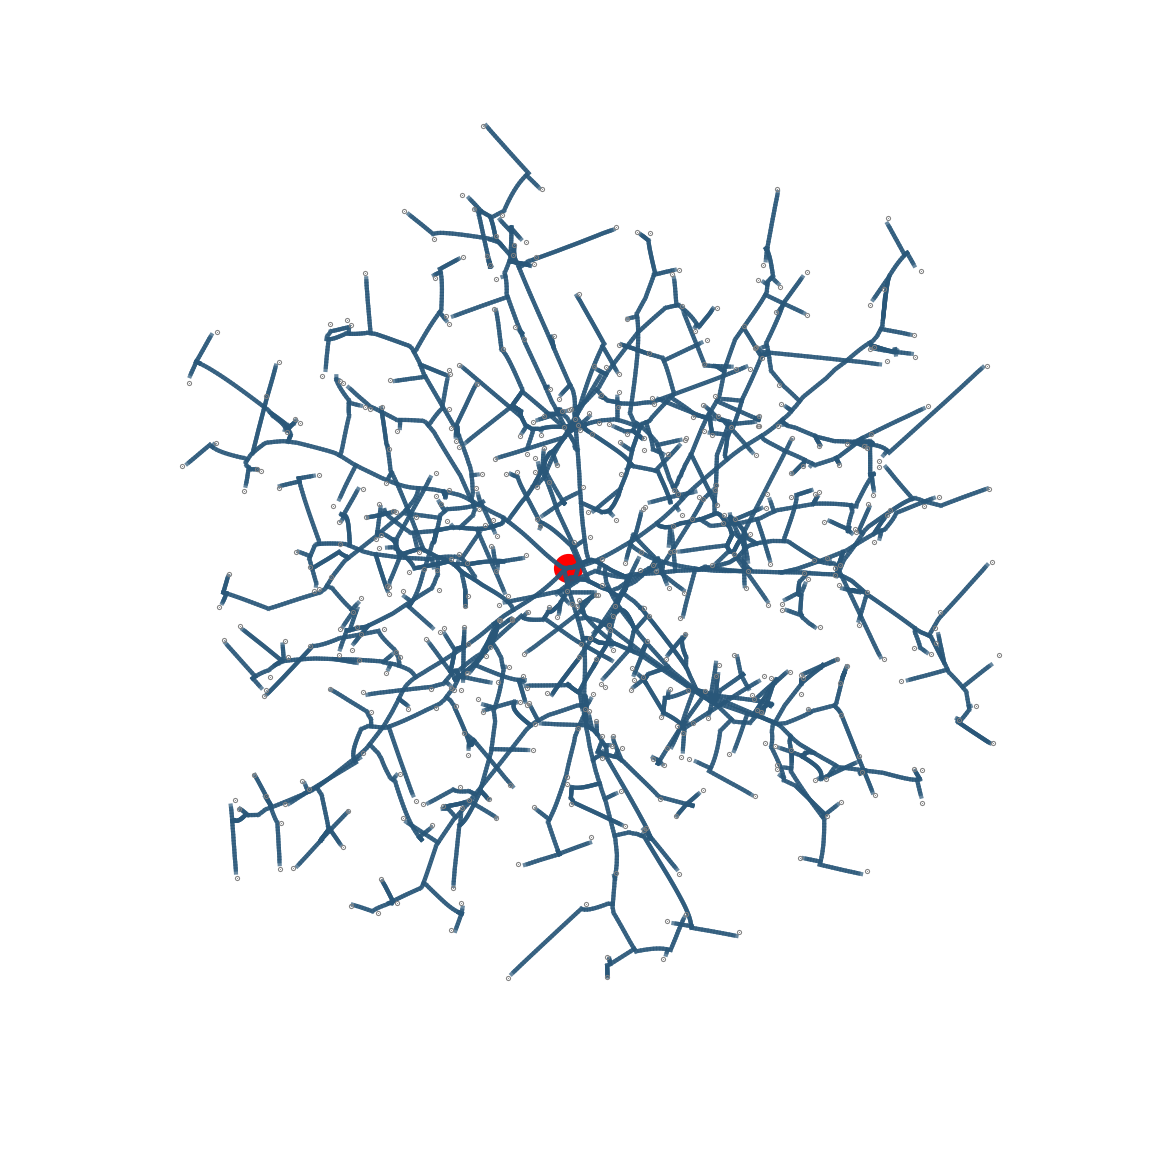

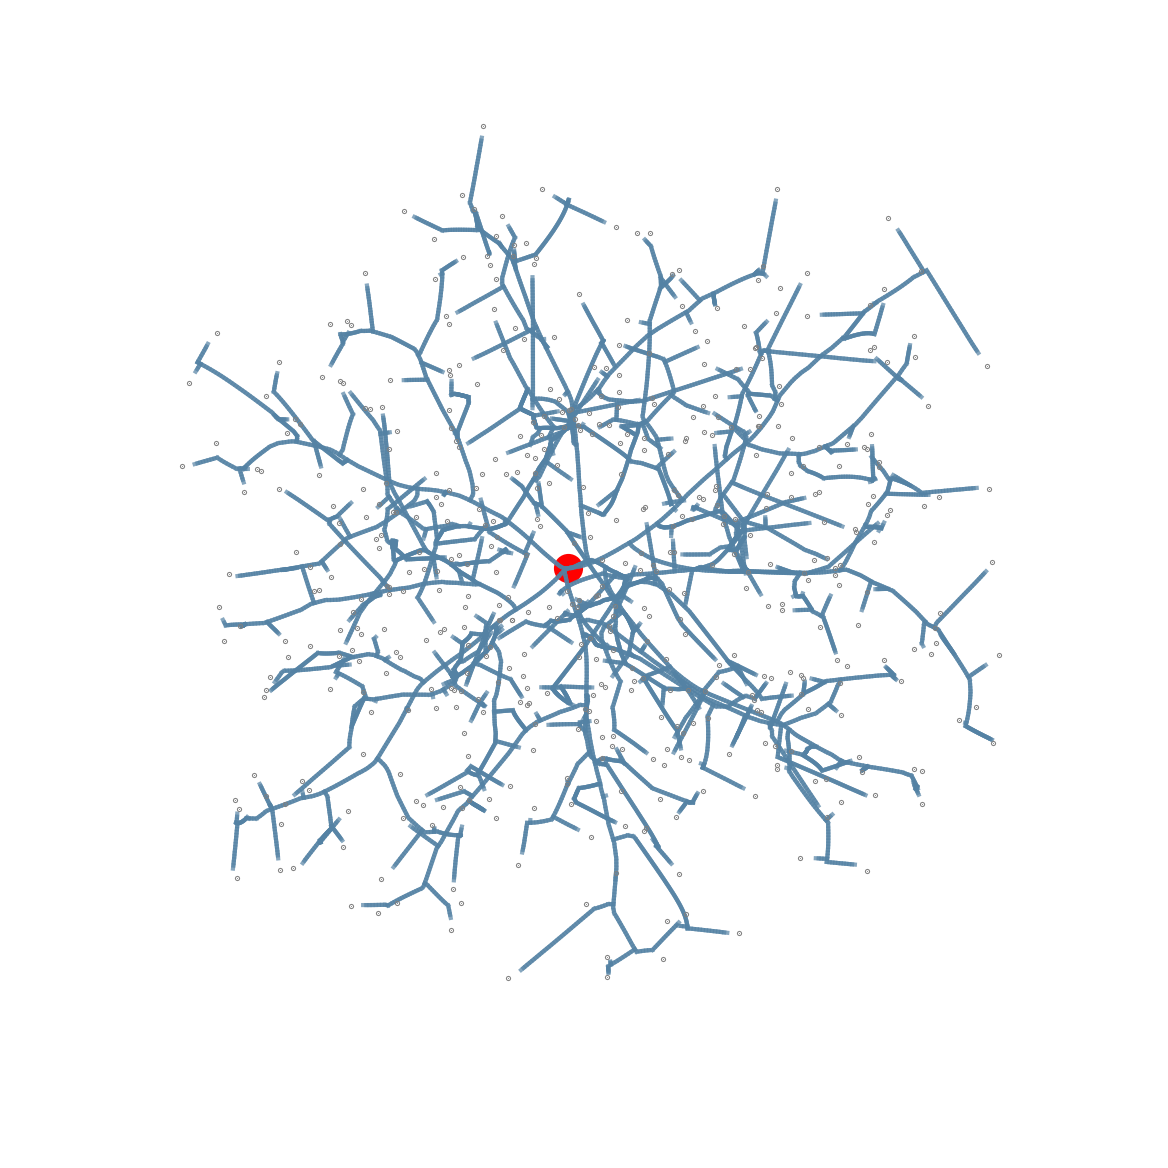

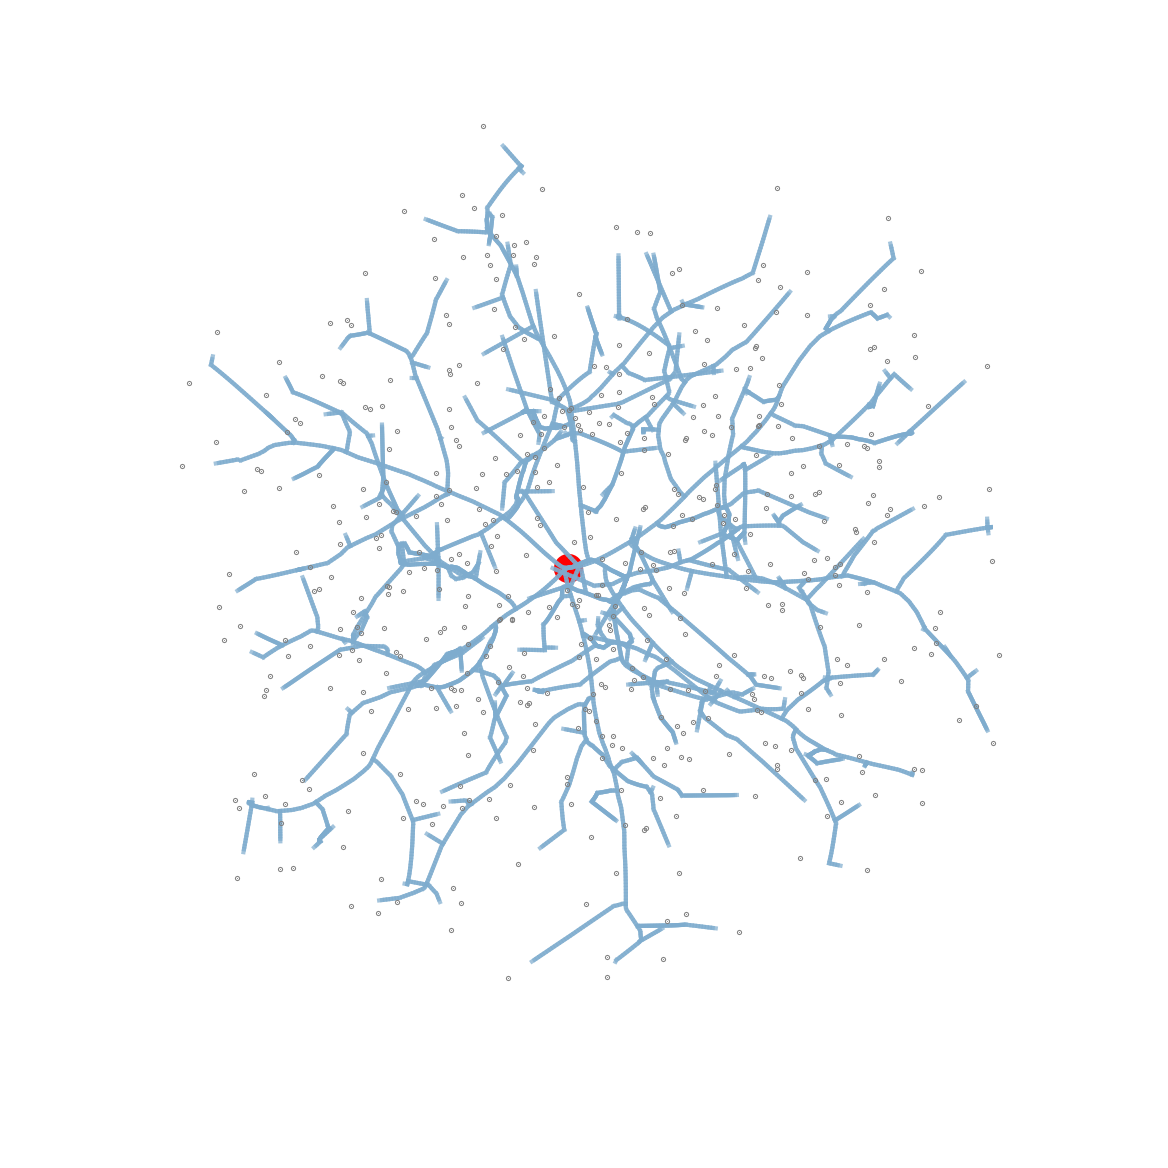

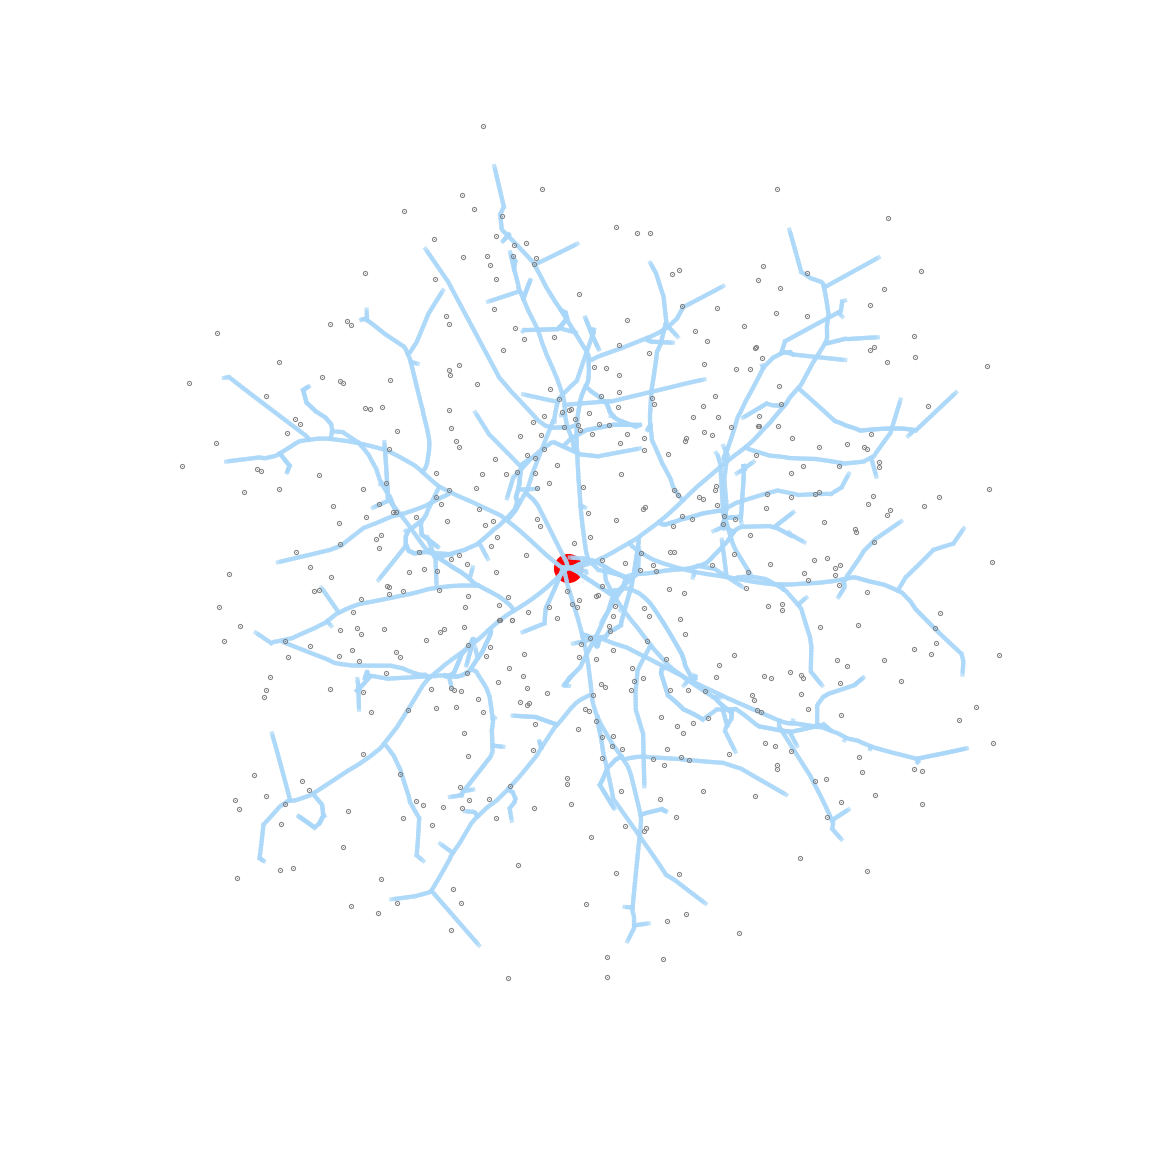

In [20]:
if verbose == True:
    for n,i in enumerate(Di):
        for m,k in enumerate(tqdm(Dk)):
            space = Space_colonization(root=root, sources=sources)
            space.set_parameters(Di=i, Dk=k, Dg=Dg, iters=10000)
            space.go_tree_classic()
            t, r, s = space.tree, space.root, space.sources
            c = combine_hex_values({Dk_colors[m]: 1.0, Di_colors[n]: 1.0})
            SCA.plot_tree(t, r, s, tree_color=c, show_leaflets=False, sources_color='gray', grid=False)
            plt.savefig('{}/Compare_SCA_k{}_i{}.png'.format(save_path, k, i))

            ratio=(1, 1, 1)
            cell_type = 7
            center = tuple([i.v for i in t if i.parent == None][0])

            graph = SCA.tree_to_graph(t, root)
            obj = astrobject.AG(graph).swc(center=center)
            SCA.swc_save(data=obj, cell_type=cell_type,
                        filename='{}/Compare_SCA_k{}_i{}.swc'.format(save_path, k, i),
                        ratio=ratio)
            

In [23]:
files = []

for n,i in enumerate(Di):
    for m,k in enumerate(Dk):
        file = '{}/Compare_SCA_k{}_i{}.swc'.format(save_path, k, i)
        files.append(file)